<a href="https://colab.research.google.com/github/plaban1981/Fastai/blob/master/Detect_and_Decode_QRcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install pyqrcode

  Created wheel for pyqrcode: filename=PyQRCode-1.2.1-cp36-none-any.whl size=36247 sha256=e0dd3c1c4fcbb95bd4045fa40d76c8ceff38827e89f823858351b3c7f3b76850
  Stored in directory: /root/.cache/pip/wheels/54/61/2f/a4f51b09473db5737db0f654ed10eb9a4ee01f83a7412de349
Successfully built pyqrcode


In [3]:
pip install pypng

     |████████████████████████████████| 655kB 3.4MB/s 
  Created wheel for pypng: filename=pypng-0.0.20-cp36-none-any.whl size=67162 sha256=81501f90fa1ee840d5b605aac27aa366c043baf2ec6b752caef3758893144035
  Stored in directory: /root/.cache/pip/wheels/41/6b/ef/0493b536b6d4722c2ae9486691b1d49b922b9877922beeabb3
Successfully built pypng


In [4]:
import pyqrcode 
import png 
from pyqrcode import QRCode 
import cv2
import numpy as np


# String which represents the QR code 
s = "https://medium.com/p/12743ca0a9d9/edit"
  
# output file name
filename = "qrcode.png"


# Generate QR code 
img = pyqrcode.create(s) 

  
# Create and save the svg file naming "myqr.svg" 
img.svg("myqr.svg", scale = 8) 
  
# Create and save the png file naming "myqr.png" 
img.png('myqr.png', scale = 6) 



# Read the QR Code

In [5]:
import cv2
# read the QRCODE image
img = cv2.imread('myqr.png')

In [6]:
img.shape

(270, 270, 3)

# Detect QR code

In [7]:
# initialize the cv2 QRCode detector
detector = cv2.QRCodeDetector()

# Decode the data

In [8]:
# detect and decode
data, bbox, straight_qrcode = detector.detectAndDecode(img)

detectAndDecode() function takes an image as an input and decodes it to return a tuple of 3 values: 

* the data decoded from the QR code,
* the output array of vertices of the found QR code quadrangle and 
* the output image containing rectified and binarized QR code.

We just need data and bbox here, bbox will help us draw the quadrangle in the image and data will be printed to the console!

In [9]:
# if there is a QR code
if bbox is not None:
    print(f"QRCode data:\n{data}")
    # display the image with lines
    # length of bounding box
    n_lines = len(bbox)
    for i in range(n_lines):
        # draw all lines
        point1 = tuple(bbox[i][0])
        point2 = tuple(bbox[(i+1) % n_lines][0])
        cv2.line(img, point1, point2, color=(255, 0, 0), thickness=2)

QRCode data:
https://medium.com/p/12743ca0a9d9/edit


* cv2.line() function draws a line segment connecting two points, we retrieve these points from bbox array that was decoded by detectAndDecode() previously. 

* we specified a blue color ( (255, 0, 0) is blue as OpenCV uses BGR colors ) and thickness of 2.

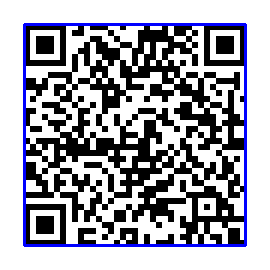

In [13]:
# Display the result
from google.colab.patches import cv2_imshow
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()